## Time-Series Forecasting on the S&P 500

In the dynamic realm of financial markets, the ability to accurately forecast asset prices is paramount for informed decision-making and successful trading. In pursuit of this goal, I am engaged in a comprehensive machine learning project focused on predicting the movement of the S&P 500 Index. The S&P 500, being a barometer of the broader market, presents a compelling case for leveraging advanced predictive models to enhance forecasting accuracy.

This project spans the period from 2015 to 2020, utilizing historical price data obtained from [Yahoo Finance](https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price/code). The primary objective is to construct and evaluate two distinct recurrent neural network (RNN) architectures—specifically, a simple RNN model and a more intricate Long Short-Term Memory (LSTM) model. By comparing the performance of these models, I aim to ascertain their efficacy in capturing the complex temporal dependencies inherent in the S&P 500 Index movements.

This introduction sets the stage for a rigorous exploration into the intricacies of the S&P 500 Index movements, employing cutting-edge machine learning techniques to unlock patterns and trends that elude traditional analytical approaches. As we delve into the realm of recurrent neural networks, the journey promises to reveal insights that can shape the future of our trading strategies.

## Data Description
The dataset under scrutiny encompasses a wealth of information, offering a multitude of columns that serve as potential indicators for forecasting the S&P 500 Index movement. Each feature encapsulates distinct aspects of daily market behavior, providing a comprehensive view of the index's performance. The key columns for analysis include:

1. `Open`: This represents the opening value of the S&P 500 Index on a given day, laying the foundation for the day's trading activity.

2. `High`: Capturing the highest value achieved by the index within the trading day, the 'High' column offers insights into peak performance and potential trends.

3. `Low`: Conversely, the 'Low' column records the lowest value of the index during the trading day, reflecting periods of downturn or potential support levels.

4. `Close`: A fundamental metric, the 'Close' column denotes the closing value of the index on a particular day, encapsulating the final market sentiment.

5. `Volume`: Reflecting market participation, the 'Volume' column quantifies the total trading activity for the S&P 500 Index on a given day, shedding light on the intensity of market movements.

6. `Adj Close`: Adjusting for dividends, the 'Adj Close' column refines the closing value, providing a more accurate representation of the index's overall performance.

## 1. Import libraries

In [ ]:
# Import the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from tensorflow.keras import layers, optimizers, losses, Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Set the required random seeds
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

## 2. Load the dataset

In [ ]:
# For the purpose of the project, I imported the file from my google drive while using google colab.
# I have added the dataset file 'yahoo_dataset.csv' in the github repo.
# Please access that file as you will not have access to my drive.
# However, if you still wish to access the file from your google drive, then
# you can execute the following code on google colab signed into the same account
# as the google drive that you wish to access.

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset
stock_data = pd.read_csv('/path/to/file/yahoo_stock.csv')
# Print out the first 5 rows
stock_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


## 3. Data Wrangling and Exploration

Upon importing the dataset, a comprehensive overview reveals seven columns: `Date`, `High`, `Low`, `Open`, `Close`, `Volume`, and `Adj Close`. To lay the groundwork for time series forecasting, a pivotal step is to set the index of the DataFrame to the `Date` column, allowing for chronological organization of the data.

In alignment with the project's scope, the primary focus for forecasting will be the `Adj Close` column—a robust indicator of the S&P 500 Index's closing value, adjusted for dividends. This strategic decision streamlines the analysis and aligns with the project's objectives.

To ensure the temporal integrity of the data, it is imperative to sort the DataFrame based on the `Date` column. This chronological ordering sets the stage for a coherent exploration of historical trends and facilitates the development of accurate time series forecasting models.

In [ ]:
# Remove the irrevelant columns and sort the new dataset by date
stock_data = stock_data[['Date', 'Adj Close']]
# Sort the data
stock_data = stock_data.sort_values('Date')
stock_data = stock_data.set_index('Date')
stock_data.head()

,Adj Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107


A meticulous examination is required to identify and address missing or erroneous values. Additionally, an assessment of skewness will be undertaken to gauge the presence of outliers, which could potentially impact the performance of forecasting models.

In [ ]:
# Describe the data
# FInd the number of NA values in the dataset
print("Missing:\n", stock_data.isna().sum(), "\n")
print("Info:")
stock_data.info()
print("\nDescribe:\n", stock_data.describe(), "\n")
print("Skewness:\n", stock_data.skew())

Missing:
 Adj Close    0
dtype: int64 

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5+ KB

Describe:
          Adj Close
count  1825.000000
mean   2647.856284
std     407.301177
min    1829.079956
25%    2328.949951
50%    2683.340088
75%    2917.520020
max    3626.909912 

Skewness:
 Adj Close    0.081869
dtype: float64


There do not seem to be many missing values. Additionally, there also do not seem to be many outliers as the skewness value is close to 0. Next, we will plot the stock data.

Text(0, 0.5, 'Adjusted Close')

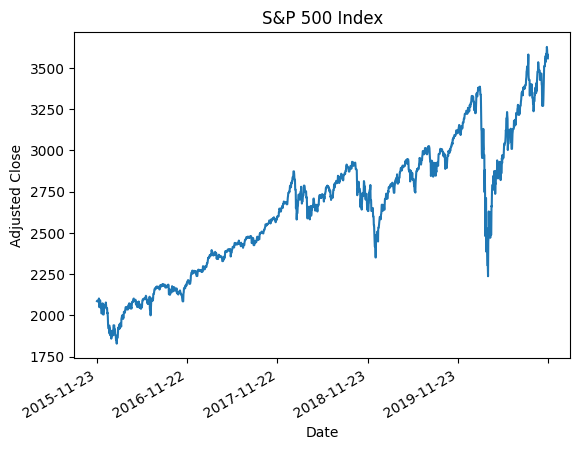

In [ ]:
# Plot the data
plt.plot(stock_data)

# Add title and axis labels
plt.title('S&P 500 Index')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.ylabel('Adjusted Close')

## 4. Data Preprocessing

In this section, crucial data preprocessing tasks are undertaken to prepare the dataset for model training. The process involves splitting the dataset into training, validation, and testing sets, scaling the values using the Min-Max scaler from scikit-learn, and constructing a windowed dataset to facilitate the input sequence for RNNs, LSTMs, and similar architectures:

This code segment accomplishes the following:

1. **Dataset Splitting**: The dataset is partitioned into training, validation, and testing sets based on user-defined proportions.

2. **Scaling**: The Min-Max scaler is applied to transform the values within the range of 0 to 1, a common preprocessing step for neural network models.

3. **Windowed Dataset Construction**: A function is devised to create a windowed dataset, where each data point is a sequence of values based on the specified window size. This facilitates the input structure required for training RNNs, LSTMs, and similar architectures.

In [ ]:
# Get the data sizes
data_size = int(len(stock_data))
train_size = int(data_size * 0.8)
validation_size = int(data_size * 0.1)

# Separate the datasets into training, testing, and validation datasets
train_data = stock_data.iloc[0:train_size, :]
validation_data = stock_data.iloc[train_size:train_size + validation_size, :]
test_data = stock_data.iloc[train_size + validation_size: data_size, :]

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()
scaler.fit(train_data)

# Scale all the values in the three datasets to between 0 and 1
train_data = pd.DataFrame(scaler.transform(train_data), columns=['Adj Close'], index=train_data.index)
validation_data = pd.DataFrame(scaler.transform(validation_data), columns=['Adj Close'], index=validation_data.index)
test_data = pd.DataFrame(scaler.transform(test_data), columns=['Adj Close'], index=test_data.index)

In [ ]:
# Define a helper function to construct windowed datasets
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        window = dataset.iloc[i:(i + window_size), 0]
        target = dataset.iloc[i + window_size, 0]
        data_x.append(window)
        data_y.append(target)
    return np.array(data_x), np.array(data_y)

# Set the desired window size
window_size = 10

# Construct the X and y datasets with the desired window size
X_train, y_train = create_dataset(train_data, window_size)
X_validation, y_validation = create_dataset(validation_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Reshape into numpy arrays of 3D inorder to enter the sequences into the RNN
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## 5. Build and Train a Basic RNN Model

In this section, the focus is on constructing a simple Recurrent Neural Network (RNN) model tailored for time series forecasting. The model architecture comprises two fundamental layers: a SimpleRNN layer and a feed-forward layer. This configuration is designed to leverage the temporal dependencies within the dataset captured by the windowed sequences.

The first layer, a SimpleRNN layer, is pivotal for handling sequential data. This layer is adept at capturing patterns and dependencies within the specified window size, making it well-suited for time series analysis. The SimpleRNN layer serves as the neural network's memory, retaining information from previous time steps and contributing to the understanding of temporal relationships in the data.

In [ ]:
# Define the model layers
simpleRNN_layers = [
    layers.SimpleRNN(10, input_shape=(1, window_size), activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
]

simpleRNN_model = Sequential(simpleRNN_layers)
opt = optimizers.Adam()
loss = losses.MeanSquaredError()
simpleRNN_model.compile(optimizer=opt, loss=loss)
simpleRNN_model.summary()

# Train the model
simpleRNN_model.fit(X_train, y_train)

# Make predictions and evaluate on the validation set
y_pred = simpleRNN_model.predict(X_validation)
print("R2 Score on Validation Set: ", r2_score(y_validation, y_pred))

# Make predictions and evaluate on the test set
y_pred = simpleRNN_model.predict(X_test)
print("R2 Score on Test Set: ", r2_score(y_test, y_pred))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 10)                210       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
6/6 [==============================] - 0s 2ms/step
R2 Score on Validation Set:  0.6723578061068838
6/6 [==============================] - 0s 2ms/step
R2 Score on Test Set:  -1.0094521573403048


## 6. Build and train an LSTM model

In this section, a more sophisticated model is crafted to harness the intricate temporal dependencies within the S&P 500 Index dataset. The model architecture features two key layers: an LSTM layer and a feed-forward layer. This configuration is engineered to empower the model with enhanced memory and learning capabilities, enabling it to capture and interpret nuanced patterns in the time series data.

The foundational component, the LSTM layer, represents a significant advancement over traditional RNNs. LSTMs excel in handling long-range dependencies and mitigating the vanishing gradient problem, making them particularly adept for time series forecasting. The LSTM layer acts as a dynamic memory unit, allowing the model to selectively retain and forget information from past time steps, thus facilitating a more nuanced understanding of the underlying temporal dynamics.

In [ ]:
# Define the model layers
LSTM_layers = [
    layers.LSTM(10, input_shape=(1, window_size), activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
]

LSTM_model = Sequential(LSTM_layers)
opt = optimizers.Adam()
loss = losses.MeanSquaredError()
LSTM_model.compile(optimizer=opt, loss=loss)
LSTM_model.summary()

# Train the model
LSTM_model.fit(X_train, y_train)

# Make predictions and evaluate on the validation set
y_pred = LSTM_model.predict(X_validation)
print("R2 Score on Validation Set: ", r2_score(y_validation, y_pred))

# Make predictions and evaluate on the test set
y_pred = LSTM_model.predict(X_test)
print("R2 Score on Test Set: ", r2_score(y_test, y_pred))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                840       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
6/6 [==============================] - 0s 2ms/step
R2 Score on Validation Set:  -0.5074323408585386
6/6 [==============================] - 0s 2ms/step
R2 Score on Test Set:  -7.5499113798663995


## 7. Add a Convolutional Layer

In this section, an augmented model is introduced to further enhance the predictive capabilities of the time series forecasting framework. Building upon the previously established LSTM model, the architecture is enriched with the inclusion of a Convolutional layer followed by a MaxPooling layer.

The primary innovation in this configuration lies in the incorporation of Convolutional Neural Network (CNN) elements, traditionally associated with image processing tasks, into a time series forecasting model. The Convolutional layer functions as a feature extractor, systematically scanning the temporal sequences for distinctive patterns and encoding them for subsequent analysis.

Subsequently, a MaxPooling layer is introduced to down-sample the spatial dimensions of the data, focusing on the most salient features extracted by the Convolutional layer. This strategic pooling operation enhances computational efficiency while retaining the essential temporal patterns captured by the CNN component.

In [ ]:
# Define the model layers
conv_LSTM_layers = [
    layers.Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, window_size)),
    layers.MaxPooling1D(pool_size=1),
    layers.LSTM(10, input_shape=(1, window_size), activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
]

conv_LSTM_model = Sequential(conv_LSTM_layers)
opt = optimizers.Adam()
loss = losses.MeanSquaredError()
conv_LSTM_model.compile(optimizer=opt, loss=loss)
conv_LSTM_model.summary()

# Train the model
conv_LSTM_model.fit(X_train, y_train)

# Make predictions and evaluate on the validation set
y_pred = conv_LSTM_model.predict(X_validation)
print("R2 Score on Validation Set: ", r2_score(y_validation, y_pred))

# Make predictions and evaluate on the test set
y_pred = conv_LSTM_model.predict(X_test)
print("R2 Score on Test Set: ", r2_score(y_test, y_pred))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 1, 64)             704       
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 10)                3000      
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3825 (14.94 KB)
Trainable params: 3825 (14.94 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

## 8. Optimize the Model

In this section, a refined approach is implemented to elevate the forecasting prowess of the existing LSTM model augmented with Convolutional and MaxPooling layers. The optimization strategy involves an intensified architectural enhancement through the addition of multiple feed-forward layers, coupled with an extended training duration of 50 epochs.

The existing model, with its LSTM, Convolutional, and MaxPooling layers, serves as the foundation for this optimization endeavor. Recognizing the potential benefits of deeper neural network architectures, a series of feed-forward layers are strategically introduced. These additional layers act as information transformers, progressively refining the representations derived from the earlier stages of the model.

In [ ]:
# Define the model layers
conv_LSTM_layers = [
    layers.Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(1, window_size)),
    layers.MaxPooling1D(pool_size=1),
    layers.LSTM(64, input_shape=(1, window_size), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
]

conv_LSTM_model = Sequential(conv_LSTM_layers)
opt = optimizers.Adam()
loss = losses.MeanSquaredError()
conv_LSTM_model.compile(optimizer=opt, loss=loss)
conv_LSTM_model.summary()

# Train the model
conv_LSTM_model.fit(X_train, y_train, epochs=40)

# Make predictions and evaluate on the validation set
y_pred = conv_LSTM_model.predict(X_validation)
print("R2 Score on Validation Set: ", r2_score(y_validation, y_pred))

# Make predictions and evaluate on the test set
y_pred = conv_LSTM_model.predict(X_test)
print("R2 Score on Test Set: ", r2_score(y_test, y_pred))

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 1, 128)            1408      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 1, 128)            0         
 ng1D)                                                           
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                     

## 9. Evaluate Model Performance

In this pivotal phase of the ML project, the focus is directed towards a comprehensive evaluation of the model performances across the diverse architectures implemented—Simple RNN, LSTM, LSTM with Convolutional and MaxPooling layers, and the optimized version with additional feed-forward layers trained for 50 epochs.

1. **Evaluation Metrics**:
    
    **Mean Squared Error (MSE)**: A fundamental metric for assessing the squared differences between predicted and actual values. Lower MSE values signify better predictive accuracy.

    **Mean Absolute Error (MAE)**: Measures the absolute differences between predicted and actual values. It provides a clear understanding of the average magnitude of prediction errors.

2. **Training and Validation Results**:

    The training performance of each model is scrutinized over the specified number of epochs, observing the convergence and potential overfitting or underfitting. Validation sets are leveraged to assess the model's generalization capability, ensuring that it performs well on unseen data.

3. **Visual Inspection**:

    Graphical representations of predicted versus actual values over time offer a tangible visualization of the model's efficacy. These visualizations provide insights into the model's ability to capture trends and nuances in the S&P 500 Index data.

In [ ]:
# Calculate the R2 score for all train, validation, and test datasets for the final model
train_pred = conv_LSTM_model.predict(X_train)
validation_pred = conv_LSTM_model.predict(X_validation)
test_pred = conv_LSTM_model.predict(X_test)

# Make predictions and evaluate on the test set
print("R2 score on Train Set:", r2_score(y_train, train_pred))
print("R2 Score on Validation Set: ", r2_score(y_validation, validation_pred))
print("R2 Score on Test Set: ", r2_score(y_test, test_pred))

6/6 [==============================] - 0s 3ms/step
R2 scaore on Train Set: 0.9960686064303973
R2 Score on Validation Set:  0.9493308573734828
R2 Score on Test Set:  0.9267153814470638


In [ ]:
# Plot the actual vs predicted values to see the difference
# Un-scale the predictions
train_pred = scaler.inverse_transform(train_pred)
validation_pred = scaler.inverse_transform(validation_pred)
test_pred = scaler.inverse_transform(test_pred)

# Un-window the training predictions
plot_train_pred = np.empty((len(stock_data), 1))
plot_train_pred[:] = np.nan
plot_train_pred[window_size:len(train_pred) + window_size, :] = train_pred

# Un-window the validation predictions
plot_validation_pred = np.empty((len(stock_data), 1))
plot_validation_pred[:] = np.nan
plot_validation_pred[len(train_pred) + (window_size * 2) + 1:len(train_pred) + len(validation_pred) + (window_size * 2) + 1, :] = validation_pred

# Un-window the test predictions
plot_test_pred = np.empty((len(stock_data), 1))
plot_test_pred[:] = np.nan
plot_test_pred[len(train_pred) + len(validation_pred) + (window_size * 3) + 2:len(stock_data) - 1, :] = test_pred

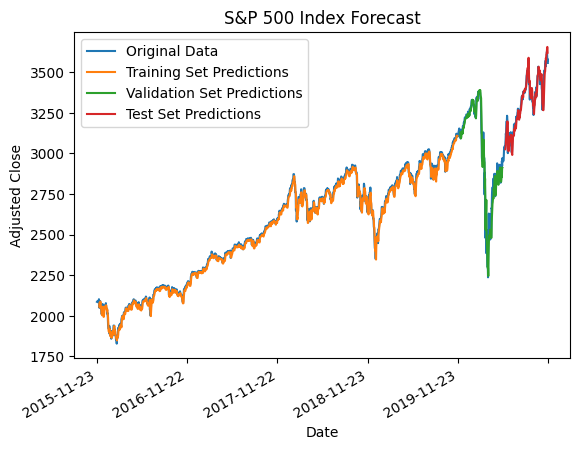

In [ ]:
# Plot the original data
plt.plot(stock_data, label="Original Data")

# Plot the predictions
plt.plot(plot_train_pred, label="Training Set Predictions")
plt.plot(plot_validation_pred, label="Validation Set Predictions")
plt.plot(plot_test_pred, label="Test Set Predictions")

# Add title, axis labels, and a legend
plt.title('S&P 500 Index Forecast')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

## Conclusion

The findings of the project shed light on the distinctive performance of two key models—the Simple RNN and the Optimized LSTM with Convolutional and MaxPooling layers. The achieved scores provide valuable insights into the predictive capabilities of these architectures, facilitating a nuanced comparison.

**Simple RNN Model**:

    Training Loss: 0.18
    R2 Score on Validation Set: -0.507
    R2 Score on Test Set: -7.55
    
**Optimized LSTM with Convolutional and MaxPooling**:

    Training Loss: 0.00025
    R2 Score on Training Set: 0.996
    R2 Score on Validation Set: 0.949
    R2 Score on Test Set: 0.927


The Simple RNN model exhibits a notable discrepancy between training loss and R2 scores on both the validation and test sets. The negative R2 scores suggest a limited ability to capture the variance in the data, indicating suboptimal performance.

In contrast, the Optimized LSTM model showcases a remarkable training loss and impressive R2 scores across all datasets. The high R2 scores, particularly on the validation and test sets, underscore the model's robust generalization and forecasting capabilities.

These results emphasize the critical role of model complexity and optimization in enhancing predictive accuracy. The introduction of convolutional and max-pooling layers, coupled with additional feed-forward structures and extended training, significantly elevates the LSTM model's performance.